In [2]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

#from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

# Load The Data Sets

In [4]:
train_demo=pd.read_csv('Train_Demographics.csv')
train_claim=pd.read_csv('Train_Claim.csv',na_values=['?','-5','MISSINGVALUE','MISSEDDATA'])
train_policy=pd.read_csv('Train_Policy.csv',na_values=['?','-1','MISSINGVAL','MISSEDDATA'])
train_vehicle=pd.read_csv('Train_Vehicle.csv',na_values=['?','-1','MISSINGVAL','MISSEDDATA','???'])
train_target=pd.read_csv('Traindata_with_Target.csv',na_values=['?','-1','MISSINGVAL','MISSEDDATA','???'])

In [5]:
print('1) Train Demographics Data set checking Null values :'),
print(train_demo.isnull().sum())
print('')
print('a) Dtypes of the Demographic data set :')
print(train_demo.dtypes)
print('')
print('b) shape of the  Demographic data is  : ',train_demo.shape),
print('')
print('')


print('2) Train claim Data set checking Null values :')
print(train_claim.isnull().sum())
print('')
print('a) Dtypes of the claim data set :')
print(train_claim.dtypes)
print('')
print('b) shape of the claim data is  : ',train_claim.shape)
print('')
print('')


print('3) Train poliy Data set checking Null values :')
print(train_policy.isnull().sum())
print('')
print('a) Dtypes of the policy data set :')
print(train_policy.dtypes)
print('')
print('b) shape of the policy data is  : ',train_policy.shape)
print('')
print('')


print('4) Train vehicle Data set checking Null values :')
print(train_vehicle.isnull().sum())
print('')
print('a) Dtypes of the vehicle data set :')
print(train_vehicle.dtypes)
print('')
print('b) shape of the vehicle data is  : ',train_vehicle.shape)
print('')
print('')

print('5) Train target Data set checking Null values :')
print(train_target.isnull().sum())
print('')
print('a) Dtypes of the target data set :')
print(train_vehicle.dtypes)
print('')
print('b) shape of the target data is  : ',train_target.shape)
print('')


1) Train Demographics Data set checking Null values :
CustomerID                0
InsuredAge                0
InsuredZipCode            0
InsuredGender            30
InsuredEducationLevel     0
InsuredOccupation         0
InsuredHobbies            0
CapitalGains              0
CapitalLoss               0
Country                   2
dtype: int64

a) Dtypes of the Demographic data set :
CustomerID               object
InsuredAge                int64
InsuredZipCode            int64
InsuredGender            object
InsuredEducationLevel    object
InsuredOccupation        object
InsuredHobbies           object
CapitalGains              int64
CapitalLoss               int64
Country                  object
dtype: object

b) shape of the  Demographic data is  :  (28836, 10)


2) Train claim Data set checking Null values :
CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted

In [6]:
train_vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [7]:

print('shape of vehicle data is  : ',train_vehicle.shape)
print('')
print('Unique Values Of the CustomerID')
print('')
print(train_vehicle['CustomerID'].value_counts())

shape of vehicle data is  :  (115344, 3)

Unique Values Of the CustomerID

Cust20179    4
Cust23045    4
Cust3818     4
Cust7461     4
Cust16944    4
            ..
Cust30090    4
Cust9783     4
Cust20478    4
Cust35879    4
Cust15237    4
Name: CustomerID, Length: 28836, dtype: int64


GroupBy

In [8]:
#train_vehicle = train_vehicle.groupby(['CustomerID', 'VehicleAttribute'])['VehicleAttributeDetails'].first().unstack()
#train_vehicle1 = train_vehicle.reset_index()


In [9]:
# pivot the DataFrame so that each vehicle attribute becomes a column
train_vehicle = train_vehicle.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails')

# reset the index to turn the CustomerID column into a regular column
train_vehicle= train_vehicle.reset_index()


In [10]:
train_vehicle

VehicleAttribute,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...
28831,Cust9993,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,Vehicle10240,Suburu,Forrestor,2004


# Using Merge Function To Combine all Datasets On Basis is 'CustomerID'

In [11]:
df=train_demo.merge(train_policy,on='CustomerID')
df1=df.merge(train_claim,on='CustomerID')
df2=df1.merge(train_vehicle,on='CustomerID')
final_train=df2.merge(train_target,on='CustomerID')


In [12]:
final_train.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013,Vehicle26917,Audi,A5,2008,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903,Vehicle15893,Audi,A5,2006,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481,Vehicle28633,Toyota,CRV,2010,N


In [13]:
print('#  shape of the final merged data :  ',final_train.shape)
print('')
print('')
print('#  CHECKING THE NULL VALUES IN FINAL DATA SET IS : ')
print(final_train.isnull().sum())

#  shape of the final merged data :   (28836, 42)


#  CHECKING THE NULL VALUES IN FINAL DATA SET IS : 
CustomerID                        0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                           2
InsurancePolicyNumber             0
CustomerLoyaltyPeriod             0
DateOfPolicyCoverage              0
InsurancePolicyState              0
Policy_CombinedSingleLimit        0
Policy_Deductible                 0
PolicyAnnualPremium             141
UmbrellaLimit                     0
InsuredRelationship               0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                   

# Handling the Null Values


a) Null values are present in our dataset is more than 25% of original data values are there, we cannot use 
"simple imputer" , because we provide wrong data details it leads to bias variance of the data set.

1) Null values are present in "" Typeofcollission "" = 5162 'NAN'

2) Null values are present in "" PropertyDamage "" = 10459 'NAN'

3) Null values are present in "" PoliceReport "" = 9805 'NAN'

In [14]:
print('#  Number of unique values are present in "" Typeofcollission ""  :',final_train['TypeOfCollission'].unique())

print('')

print('#  Number of unique values are present in "" PropertyDamage ""  :',final_train['PropertyDamage'].unique())

print('')


print('#  Number of unique values are present in "" PoliceReport ""  :',final_train['PoliceReport'].unique())

#  Number of unique values are present in "" Typeofcollission ""  : ['Side Collision' 'Rear Collision' 'Front Collision' nan]

#  Number of unique values are present in "" PropertyDamage ""  : [nan 'YES' 'NO']

#  Number of unique values are present in "" PoliceReport ""  : [nan 'YES' 'NO']


In [15]:
final_train['TypeOfCollission'].fillna('other collision', inplace=True)

In [16]:
final_train['PropertyDamage'].fillna('No info Recoreded', inplace=True)

In [17]:
final_train['PoliceReport'].fillna('No info Recoreded', inplace=True)

In [18]:
print('After filling "Nan" values Checking is there any null values are there in "TypeOfCollission" : ',final_train['TypeOfCollission'].isnull().sum())
print('After filling "Nan" values Checking is there any null values are there in "PropertyDamage" : ',final_train['PropertyDamage'].isnull().sum())
print('After filling "Nan" values Checking is there any null values are there in "PoliceReport" :',final_train['PoliceReport'].isnull().sum())

After filling "Nan" values Checking is there any null values are there in "TypeOfCollission" :  0
After filling "Nan" values Checking is there any null values are there in "PropertyDamage" :  0
After filling "Nan" values Checking is there any null values are there in "PoliceReport" : 0


In [19]:
final_train.isnull().sum()

CustomerID                      0
InsuredAge                      0
InsuredZipCode                  0
InsuredGender                  30
InsuredEducationLevel           0
InsuredOccupation               0
InsuredHobbies                  0
CapitalGains                    0
CapitalLoss                     0
Country                         2
InsurancePolicyNumber           0
CustomerLoyaltyPeriod           0
DateOfPolicyCoverage            0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
Policy_Deductible               0
PolicyAnnualPremium           141
UmbrellaLimit                   0
InsuredRelationship             0
DateOfIncident                  0
TypeOfIncident                  0
TypeOfCollission                0
SeverityOfIncident              0
AuthoritiesContacted            0
IncidentState                   0
IncidentCity                    0
IncidentAddress                 0
IncidentTime                   31
NumberOfVehicles                0
PropertyDamage

In [20]:
final_train['AmountOfTotalClaim'].fillna(final_train['AmountOfInjuryClaim']+final_train['AmountOfPropertyClaim']+final_train['AmountOfVehicleDamage'],inplace=True)

In [21]:
print('After filling "Nan" values Checking is there any null values are there in "AmountOfTotalClaim" : ',final_train['AmountOfTotalClaim'].isnull().sum())

After filling "Nan" values Checking is there any null values are there in "AmountOfTotalClaim" :  0


In [22]:
final_train.nunique()

CustomerID                    28836
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                           1
InsurancePolicyNumber         28836
CustomerLoyaltyPeriod           479
DateOfPolicyCoverage           6779
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
Policy_Deductible              1496
PolicyAnnualPremium           23851
UmbrellaLimit                  7089
InsuredRelationship               6
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  4
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                

In [23]:
final_train.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,No info Recoreded,1,0.0,No info Recoreded,65501.0,13417,6071,46013,Vehicle26917,Audi,A5,2008,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903,Vehicle15893,Audi,A5,2006,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481,Vehicle28633,Toyota,CRV,2010,N


In [24]:
#pip install pandas-profiling[notebook]


In [25]:
#import pandas_profiling


#profile = pandas_profiling.ProfileReport(final_train)
#profile.to_file(output_file="Auto Insurance EDA Profile Report.html")


In [26]:
drop_features=['InsuredZipCode','Country','CustomerID','IncidentAddress','VehicleID','InsuredHobbies','InsurancePolicyNumber']

In [27]:
final_train.drop(drop_features,axis=1,inplace=True)

In [28]:
print(final_train.shape)

(28836, 35)


In [29]:
final_train.head()

,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,35,MALE,JD,armed-forces,56700,-48500,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,17.0,3,No info Recoreded,1,0.0,No info Recoreded,65501.0,13417,6071,46013,Audi,A5,2008,N
1,36,MALE,JD,tech-support,70600,-48500,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903,Audi,A5,2006,N
2,33,MALE,JD,armed-forces,66400,-63700,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495,Volkswagen,Jetta,1999,N
3,36,MALE,JD,armed-forces,47900,-73400,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237,Volkswagen,Jetta,2003,N
4,29,FEMALE,High School,exec-managerial,0,-41500,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481,Toyota,CRV,2010,N


In [30]:
final_train['yearofpolicycoverage']=final_train['DateOfPolicyCoverage'].apply(lambda x:x.split('-')[0])

In [31]:
final_train['yearofpolicyincident']=final_train['DateOfIncident'].apply(lambda x:x.split('-')[0])

In [32]:

final_train['yearofpolicyincident'] = pd.to_datetime(final_train['yearofpolicyincident'], format='%Y')
final_train['yearofpolicycoverage'] = pd.to_datetime(final_train['yearofpolicycoverage'], format='%Y')

In [33]:
final_train['no_of_years_policy']=final_train['yearofpolicyincident'].values-final_train['yearofpolicycoverage'].values

In [34]:
final_train['no_of_years_policy']

0       6209 days
1       5479 days
2       5113 days
3       3652 days
4       6940 days
           ...   
28831   6209 days
28832   4018 days
28833   6209 days
28834   6209 days
28835   4383 days
Name: no_of_years_policy, Length: 28836, dtype: timedelta64[ns]

In [35]:
final_train['no_of_years_policy']= final_train['no_of_years_policy']/ pd.Timedelta(days=365)

In [36]:
final_train['no_of_years_policy']=final_train['no_of_years_policy'].round(0)

In [37]:
final_train['no_of_years_policy']=final_train['no_of_years_policy'].astype(int)

In [38]:
final_train.dtypes

InsuredAge                             int64
InsuredGender                         object
InsuredEducationLevel                 object
InsuredOccupation                     object
CapitalGains                           int64
CapitalLoss                            int64
CustomerLoyaltyPeriod                  int64
DateOfPolicyCoverage                  object
InsurancePolicyState                  object
Policy_CombinedSingleLimit            object
Policy_Deductible                      int64
PolicyAnnualPremium                  float64
UmbrellaLimit                          int64
InsuredRelationship                   object
DateOfIncident                        object
TypeOfIncident                        object
TypeOfCollission                      object
SeverityOfIncident                    object
AuthoritiesContacted                  object
IncidentState                         object
IncidentCity                          object
IncidentTime                         float64
NumberOfVe

In [39]:
final_train.drop(['DateOfPolicyCoverage','DateOfIncident','yearofpolicycoverage','yearofpolicyincident'],axis=1,inplace=True)

In [40]:
final_train.shape

(28836, 34)

In [41]:
final_train.dtypes

InsuredAge                      int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
CapitalGains                    int64
CapitalLoss                     int64
CustomerLoyaltyPeriod           int64
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInju

In [42]:
final_train.shape

(28836, 34)

In [43]:
final_train['Witnesses']=final_train['Witnesses'].astype(object)
final_train['BodilyInjuries']=final_train['BodilyInjuries'].astype(object)


In [44]:
final_train.drop('VehicleModel',axis=1,inplace=True)

In [45]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsuredAge                  28836 non-null  int64  
 1   InsuredGender               28806 non-null  object 
 2   InsuredEducationLevel       28836 non-null  object 
 3   InsuredOccupation           28836 non-null  object 
 4   CapitalGains                28836 non-null  int64  
 5   CapitalLoss                 28836 non-null  int64  
 6   CustomerLoyaltyPeriod       28836 non-null  int64  
 7   InsurancePolicyState        28836 non-null  object 
 8   Policy_CombinedSingleLimit  28836 non-null  object 
 9   Policy_Deductible           28836 non-null  int64  
 10  PolicyAnnualPremium         28695 non-null  float64
 11  UmbrellaLimit               28836 non-null  int64  
 12  InsuredRelationship         28836 non-null  object 
 13  TypeOfIncident              288

In [46]:
final_train.shape

(28836, 33)

In [47]:
final_train

,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleMake,VehicleYOM,ReportedFraud,no_of_years_policy
0,35,MALE,JD,armed-forces,56700,-48500,49,State1,100/300,1000,1632.73,0,not-in-family,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,17.0,3,No info Recoreded,1,0.0,No info Recoreded,65501.0,13417,6071,46013,Audi,2008,N,17
1,36,MALE,JD,tech-support,70600,-48500,114,State1,100/300,1000,1255.19,0,not-in-family,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903,Audi,2006,N,15
2,33,MALE,JD,armed-forces,66400,-63700,167,State3,500/1000,617,1373.38,0,wife,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495,Volkswagen,1999,N,14
3,36,MALE,JD,armed-forces,47900,-73400,190,State2,500/1000,722,1337.60,0,own-child,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237,Volkswagen,2003,N,10
4,29,FEMALE,High School,exec-managerial,0,-41500,115,State2,100/300,500,1353.73,4279863,unmarried,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481,Toyota,2010,N,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,MALE,Masters,protective-serv,0,0,321,State1,500/1000,655,1276.01,0,unmarried,Vehicle Theft,other collision,Trivial Damage,Police,State9,City4,3.0,1,NO,0,3.0,No info Recoreded,6590.0,870,1078,4642,Suburu,2007,N,17
28832,44,MALE,Masters,adm-clerical,0,-28800,237,State2,100/300,1089,1273.38,0,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,17.0,1,YES,0,2.0,YES,74547.0,14699,7875,51973,Jeep,2003,N,11
28833,53,MALE,PhD,transport-moving,63100,-43800,392,State3,250/500,787,1380.92,3448735,own-child,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,1.0,1,YES,2,0.0,YES,55305.0,7043,7043,41219,Suburu,2004,N,17
28834,53,MALE,Associate,transport-moving,67400,-43800,391,State3,250/500,780,1389.29,3364301,not-in-family,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,1.0,1,No info Recoreded,2,0.0,YES,55830.0,7059,7059,41712,Suburu,2004,N,17


In [48]:
final_train.dtypes

InsuredAge                      int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
CapitalGains                    int64
CapitalLoss                     int64
CustomerLoyaltyPeriod           int64
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                 object
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInju

In [49]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd

data=final_train
# Calculate the quartiles and IQR for each column
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

# Identify outliers in each column
outliers = (data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))

# Create a new DataFrame to show the location of outliers
outliers_df = pd.DataFrame(index=data.index, columns=data.columns, data=outliers.astype(int))



In [50]:
# Count the number of outliers
num_outliers = outliers.sum()

print("**Number of outliers in each column :")
print('')
print(num_outliers)



**Number of outliers in each column :

AmountOfInjuryClaim             28
AmountOfPropertyClaim          156
AmountOfTotalClaim            4949
AmountOfVehicleDamage         5009
AuthoritiesContacted             0
BodilyInjuries                   0
CapitalGains                     0
CapitalLoss                      0
CustomerLoyaltyPeriod            2
IncidentCity                     0
IncidentState                    0
IncidentTime                     0
InsurancePolicyState             0
InsuredAge                     176
InsuredEducationLevel            0
InsuredGender                    0
InsuredOccupation                0
InsuredRelationship              0
NumberOfVehicles                 0
PoliceReport                     0
PolicyAnnualPremium            299
Policy_CombinedSingleLimit       0
Policy_Deductible                0
PropertyDamage                   0
ReportedFraud                    0
SeverityOfIncident               0
TypeOfCollission                 0
TypeOfIncident  

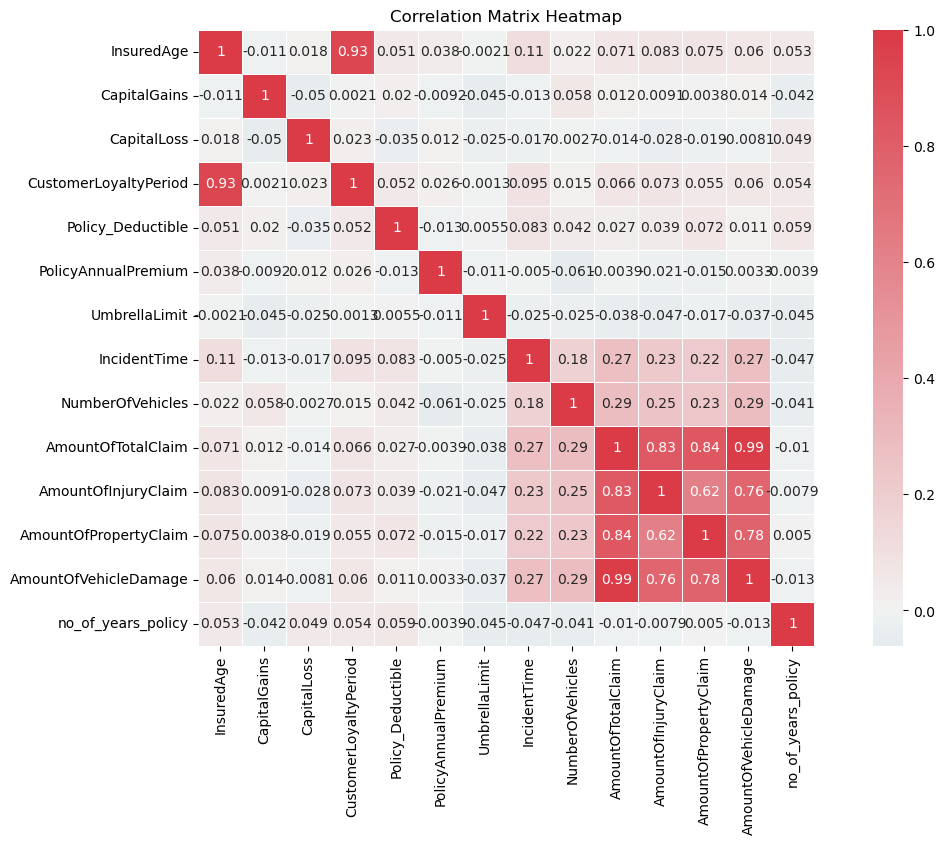

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(15,8))

# create a correlation matrix using your dataframe
corr_matrix = final_train.corr()

# define the color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, linewidths=.5, square=True)

# add a title to the plot
plt.title("Correlation Matrix Heatmap")

# show the plot
plt.show()


In [52]:
final_train.drop(['InsuredAge','AmountOfVehicleDamage','AmountOfPropertyClaim','AmountOfInjuryClaim','UmbrellaLimit'],axis=1,inplace=True)

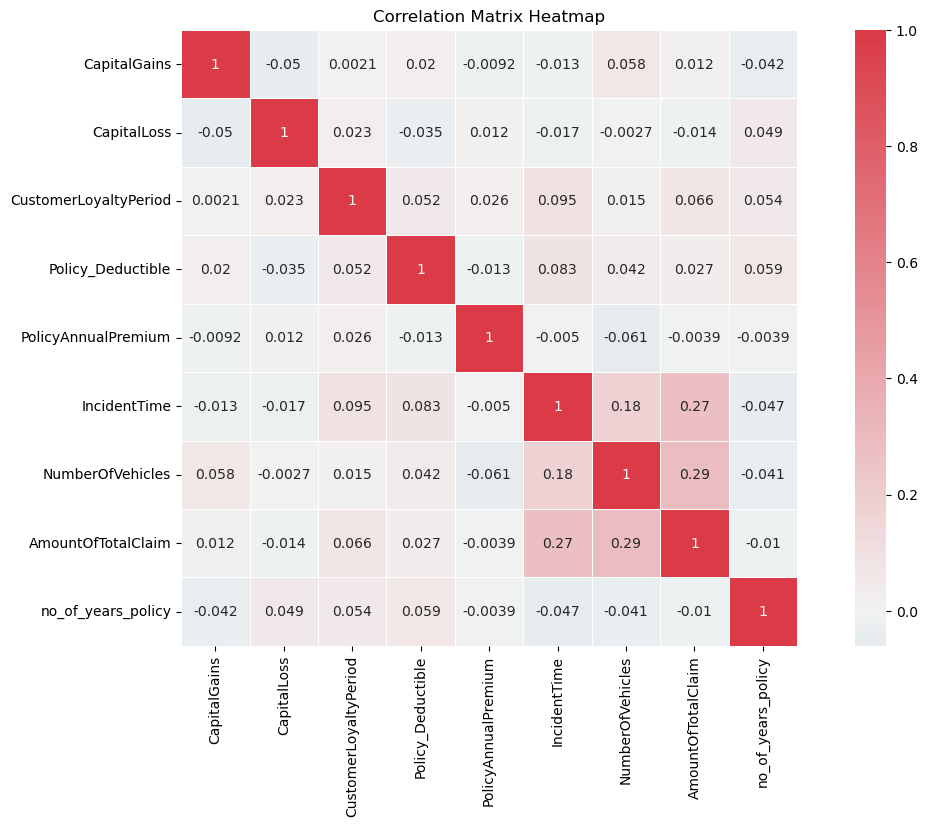

In [53]:
plt.figure(figsize=(15,8))

# create a correlation matrix using your dataframe
corr_matrix = final_train.corr()

# define the color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, linewidths=.5, square=True)

# add a title to the plot
plt.title("Correlation Matrix Heatmap")

# show the plot
plt.show()

In [54]:
def plot_variables(df):
    # loop over all numeric variables in the dataframe
    for col in df.select_dtypes(include='number'):
        plt.figure(figsize=(16,4))

        # histogram
        plt.subplot(1,2,1)
        plt.hist(df[col], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # boxplot
        plt.subplot(1,2,2)
        sns.boxplot(df[col])
        plt.xlabel(col)

        plt.show()

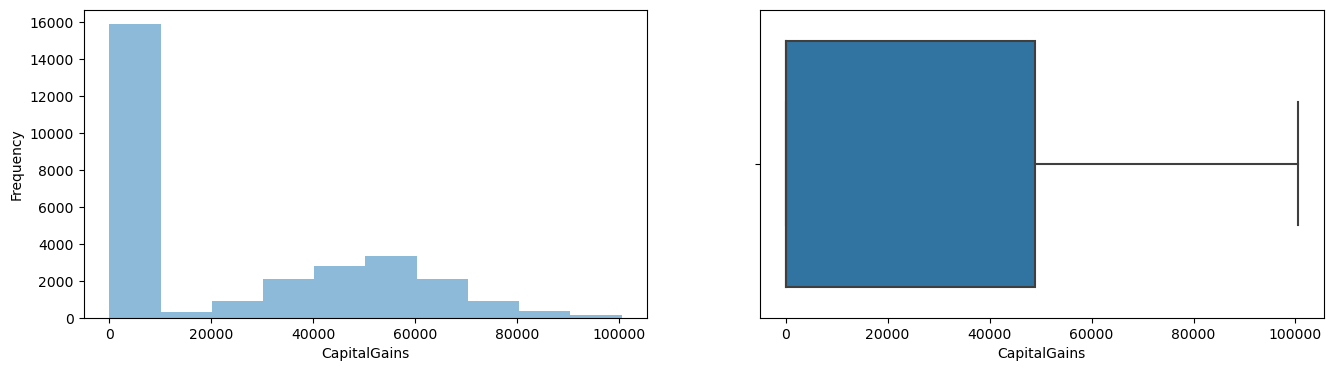

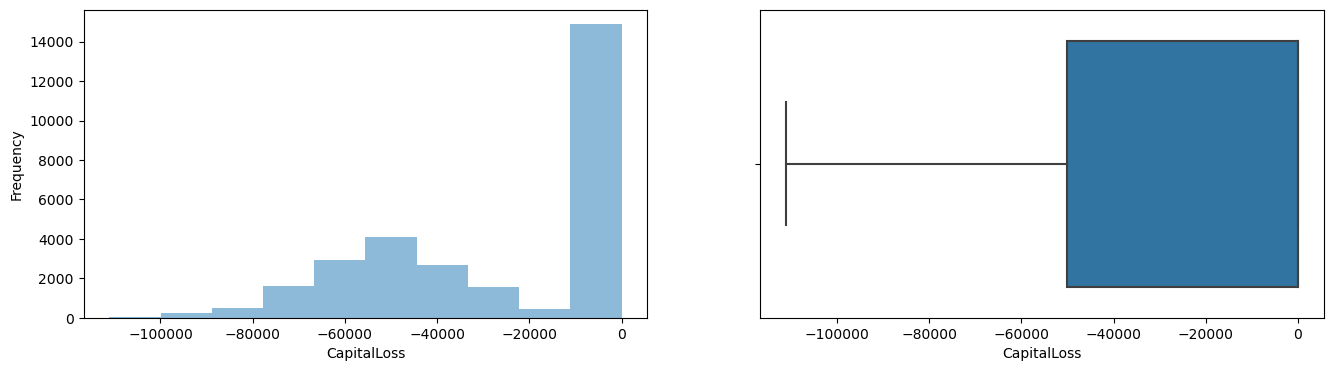

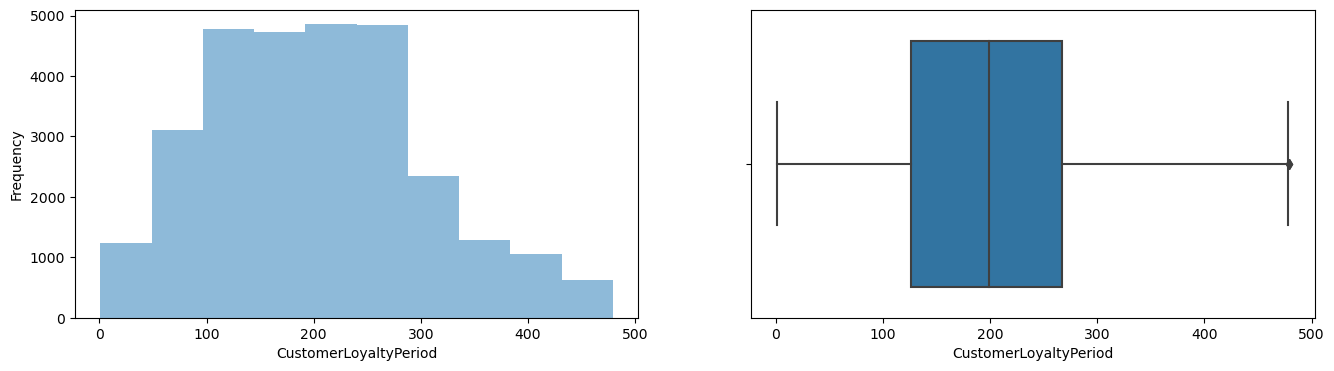

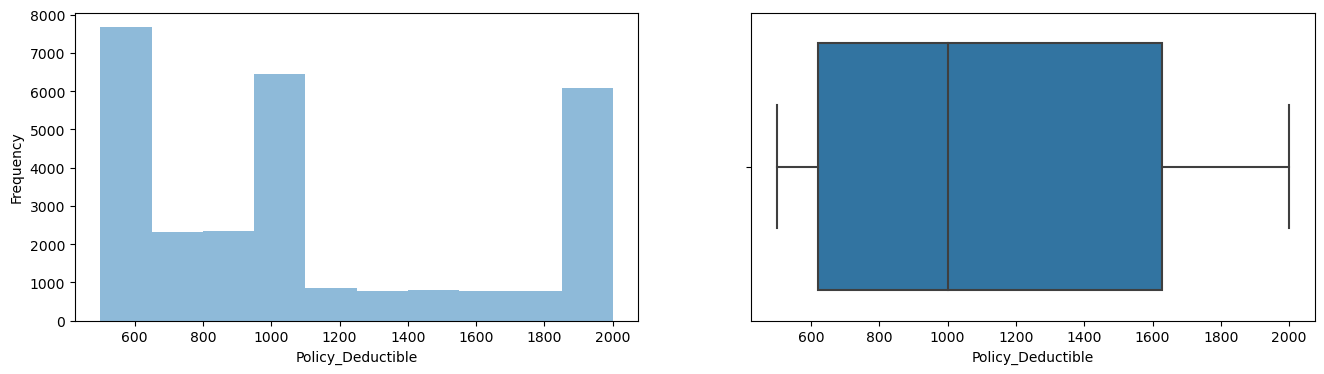

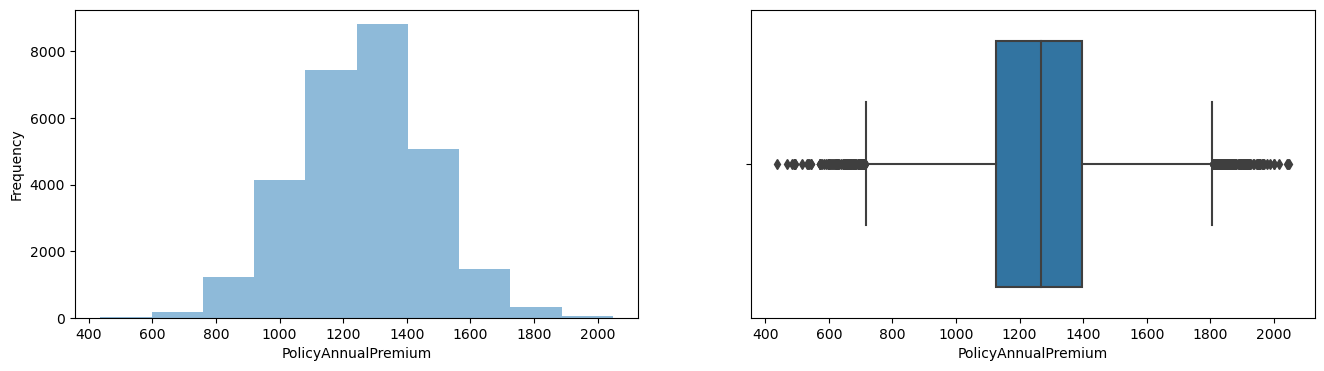

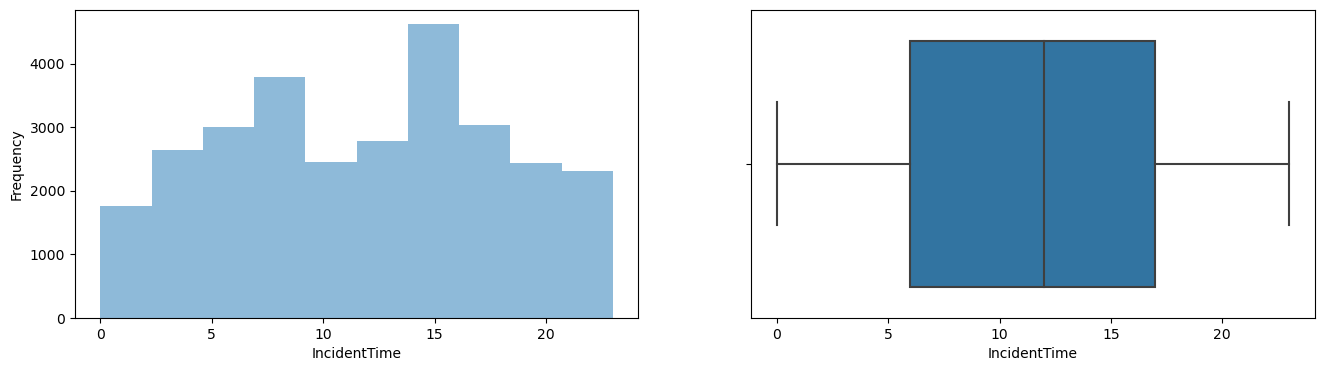

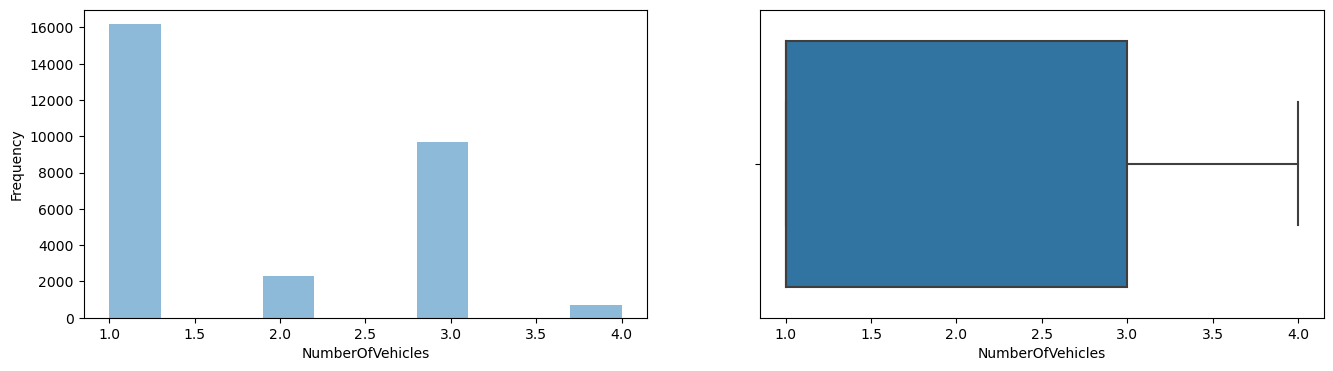

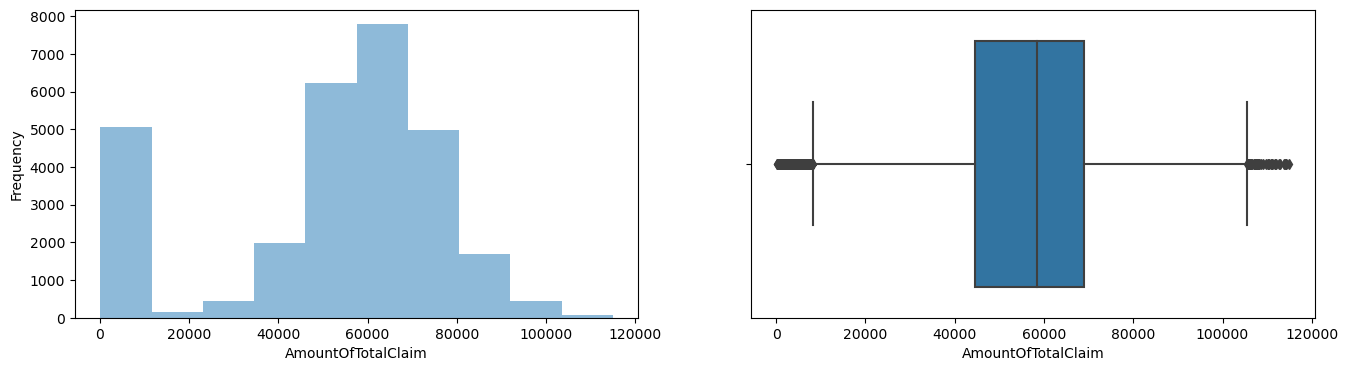

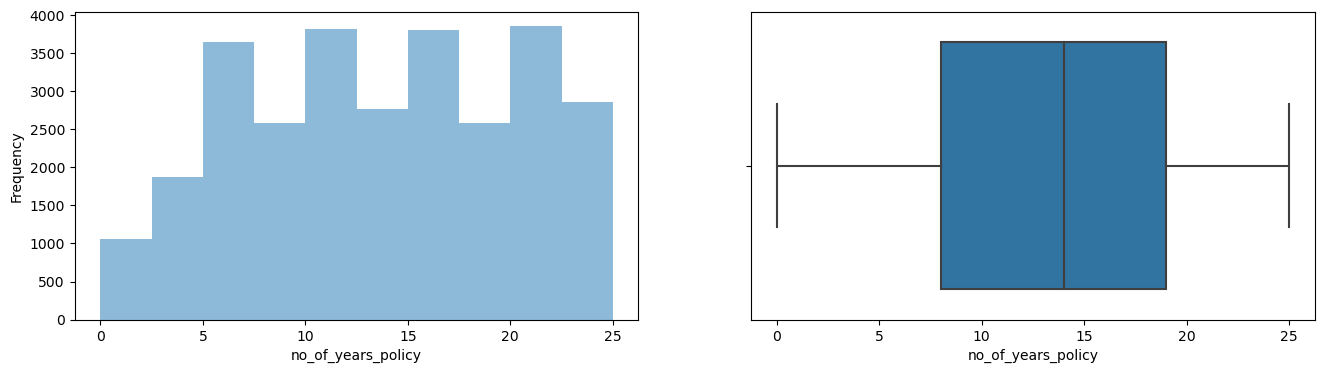

In [55]:
plot_variables(final_train)

In [56]:
import numpy as np

def find_and_remove_outliers(df):
    # create an empty dictionary to store the boundaries for each feature
    boundaries = {}

    # create an empty dictionary to store the number of outliers removed for each feature
    num_outliers_removed = {}

    # create an empty dictionary to store the number of outliers for each feature
    num_outliers = {}

    # iterate over each numeric column in the dataframe
    for col in df.select_dtypes(include='number'):
        # calculate the boundaries for the current feature
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        iqr = q3 - q1
        lower_boundary = q1 - 1.5 * iqr
        upper_boundary = q3 + 1.5 * iqr

        # store the boundaries for the current feature
        boundaries[col] = (lower_boundary, upper_boundary)

        # count the number of outliers for the current feature
        outliers_range = np.where((df[col] > upper_boundary) | (df[col] < lower_boundary), True, False)
        num_outliers[col] = sum(outliers_range)

        # remove the outliers for the current feature
        df = df.loc[~(outliers_range), :]
        num_outliers_removed[col] = num_outliers[col] - sum(np.where((df[col] > upper_boundary) | (df[col] < lower_boundary), True, False))

    return df, boundaries, num_outliers_removed, num_outliers


In [57]:
clean_data, boundaries, num_outliers_removed, num_outliers = find_and_remove_outliers(final_train)
print("Outliers before removal:\n", num_outliers)
print("Outliers removed:\n", num_outliers_removed)

Outliers before removal:
 {'CapitalGains': 0, 'CapitalLoss': 0, 'CustomerLoyaltyPeriod': 2, 'Policy_Deductible': 0, 'PolicyAnnualPremium': 299, 'IncidentTime': 0, 'NumberOfVehicles': 0, 'AmountOfTotalClaim': 4782, 'no_of_years_policy': 0}
Outliers removed:
 {'CapitalGains': 0, 'CapitalLoss': 0, 'CustomerLoyaltyPeriod': 2, 'Policy_Deductible': 0, 'PolicyAnnualPremium': 299, 'IncidentTime': 0, 'NumberOfVehicles': 0, 'AmountOfTotalClaim': 4782, 'no_of_years_policy': 0}


In [58]:
clean_data.shape

(23753, 28)

In [59]:
final_train=clean_data

In [60]:
final_train.shape

(23753, 28)

In [61]:
final_train.columns

Index(['InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'Policy_Deductible', 'PolicyAnnualPremium', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'VehicleMake', 'VehicleYOM',
       'ReportedFraud', 'no_of_years_policy'],
      dtype='object')

In [62]:
# change the column position
final_train= final_train.reindex(columns=['InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'Policy_Deductible', 'PolicyAnnualPremium', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'VehicleMake', 'VehicleYOM',
      'no_of_years_policy','ReportedFraud'])

In [63]:
final_train.head()

,InsuredGender,InsuredEducationLevel,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,InsuredRelationship,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,VehicleMake,VehicleYOM,no_of_years_policy,ReportedFraud
0,MALE,JD,armed-forces,56700,-48500,49,State1,100/300,1000,1632.73,not-in-family,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,17.0,3,No info Recoreded,1,0.0,No info Recoreded,65501.0,Audi,2008,17,N
1,MALE,JD,tech-support,70600,-48500,114,State1,100/300,1000,1255.19,not-in-family,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,10.0,3,YES,2,1.0,YES,61382.0,Audi,2006,15,N
2,MALE,JD,armed-forces,66400,-63700,167,State3,500/1000,617,1373.38,wife,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,22.0,1,YES,2,3.0,NO,66755.0,Volkswagen,1999,14,N
3,MALE,JD,armed-forces,47900,-73400,190,State2,500/1000,722,1337.60,own-child,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,22.0,1,YES,2,3.0,NO,66243.0,Volkswagen,2003,10,N
4,FEMALE,High School,exec-managerial,0,-41500,115,State2,100/300,500,1353.73,unmarried,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,10.0,1,NO,2,1.0,YES,53544.0,Toyota,2010,19,N


In [64]:
final_train.isnull().sum()

InsuredGender                  25
InsuredEducationLevel           0
InsuredOccupation               0
CapitalGains                    0
CapitalLoss                     0
CustomerLoyaltyPeriod           0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
Policy_Deductible               0
PolicyAnnualPremium           120
InsuredRelationship             0
TypeOfIncident                  0
TypeOfCollission                0
SeverityOfIncident              0
AuthoritiesContacted            0
IncidentState                   0
IncidentCity                    0
IncidentTime                   24
NumberOfVehicles                0
PropertyDamage                  0
BodilyInjuries                  0
Witnesses                      38
PoliceReport                    0
AmountOfTotalClaim              0
VehicleMake                    39
VehicleYOM                      0
no_of_years_policy              0
ReportedFraud                   0
dtype: int64

In [65]:
x=final_train.iloc[:,:-1]

In [66]:
y=final_train.iloc[:,-1]

In [67]:
x.head()

,InsuredGender,InsuredEducationLevel,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,InsuredRelationship,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,VehicleMake,VehicleYOM,no_of_years_policy
0,MALE,JD,armed-forces,56700,-48500,49,State1,100/300,1000,1632.73,not-in-family,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,17.0,3,No info Recoreded,1,0.0,No info Recoreded,65501.0,Audi,2008,17
1,MALE,JD,tech-support,70600,-48500,114,State1,100/300,1000,1255.19,not-in-family,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,10.0,3,YES,2,1.0,YES,61382.0,Audi,2006,15
2,MALE,JD,armed-forces,66400,-63700,167,State3,500/1000,617,1373.38,wife,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,22.0,1,YES,2,3.0,NO,66755.0,Volkswagen,1999,14
3,MALE,JD,armed-forces,47900,-73400,190,State2,500/1000,722,1337.60,own-child,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,22.0,1,YES,2,3.0,NO,66243.0,Volkswagen,2003,10
4,FEMALE,High School,exec-managerial,0,-41500,115,State2,100/300,500,1353.73,unmarried,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,10.0,1,NO,2,1.0,YES,53544.0,Toyota,2010,19


In [68]:
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the target variable
y=le.fit_transform(y)
y=pd.DataFrame(y)

In [69]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [70]:
num_cols=[feature for feature in x.columns if x[feature].dtypes!='O']
cat_cols=[feature for feature in x.columns if x[feature].dtypes=='O']

In [71]:
num_cols

['CapitalGains',
 'CapitalLoss',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'IncidentTime',
 'NumberOfVehicles',
 'AmountOfTotalClaim',
 'no_of_years_policy']

In [72]:
cat_cols

['InsuredGender',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'InsurancePolicyState',
 'Policy_CombinedSingleLimit',
 'InsuredRelationship',
 'TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'IncidentState',
 'IncidentCity',
 'PropertyDamage',
 'BodilyInjuries',
 'Witnesses',
 'PoliceReport',
 'VehicleMake',
 'VehicleYOM']

In [74]:
x.shape

(23753, 27)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1111)

In [76]:
print('x_train shape is : ',x_train.shape)
print('')
print('y_train shape is : ',y_train.shape)
print('')
print('x_test shape is : ',x_test.shape)
print('')
print('y_test shape is : ',y_test.shape)

x_train shape is :  (16627, 27)

y_train shape is :  (16627, 1)

x_test shape is :  (7126, 27)

y_test shape is :  (7126, 1)


In [77]:
x_train.isnull().sum()

InsuredGender                 15
InsuredEducationLevel          0
InsuredOccupation              0
CapitalGains                   0
CapitalLoss                    0
CustomerLoyaltyPeriod          0
InsurancePolicyState           0
Policy_CombinedSingleLimit     0
Policy_Deductible              0
PolicyAnnualPremium           82
InsuredRelationship            0
TypeOfIncident                 0
TypeOfCollission               0
SeverityOfIncident             0
AuthoritiesContacted           0
IncidentState                  0
IncidentCity                   0
IncidentTime                  15
NumberOfVehicles               0
PropertyDamage                 0
BodilyInjuries                 0
Witnesses                     24
PoliceReport                   0
AmountOfTotalClaim             0
VehicleMake                   26
VehicleYOM                     0
no_of_years_policy             0
dtype: int64

In [78]:
x_test.isnull().sum()

InsuredGender                 10
InsuredEducationLevel          0
InsuredOccupation              0
CapitalGains                   0
CapitalLoss                    0
CustomerLoyaltyPeriod          0
InsurancePolicyState           0
Policy_CombinedSingleLimit     0
Policy_Deductible              0
PolicyAnnualPremium           38
InsuredRelationship            0
TypeOfIncident                 0
TypeOfCollission               0
SeverityOfIncident             0
AuthoritiesContacted           0
IncidentState                  0
IncidentCity                   0
IncidentTime                   9
NumberOfVehicles               0
PropertyDamage                 0
BodilyInjuries                 0
Witnesses                     14
PoliceReport                   0
AmountOfTotalClaim             0
VehicleMake                   13
VehicleYOM                     0
no_of_years_policy             0
dtype: int64

In [79]:
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent',add_indicator=False)),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown = 'ignore'))
    ]
)

numeric_transformer = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median',add_indicator=False)),
        ('scaler', StandardScaler())
    ]
)


In [80]:
ct=ColumnTransformer([
    ('num_cols',numeric_transformer,num_cols),
    ('cat_cols',categorical_transformer,cat_cols)
])

# MODEL IS OVER FITTING ON MY TRAIN DATA :
    MY DATA IS IMBALANCE TO REDUCE THE OVER FITTING I AM USING UPSAMPLING (SMOTE)

#This ReportedFraud TARGET VARIABLE DISTRIBUTES  70% :'NO',30%:'YES'

In [81]:
scaled_features= Pipeline(steps=[('preprocessor',ct)])

In [83]:
scaled_features.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CapitalGains',
                                                   'CapitalLoss',
                                                   'CustomerLoyaltyPeriod',
                                                   'Policy_Deductible',
                                                   'PolicyAnnualPremium',
                                                   'IncidentTime',
                                                   'NumberOfVehicles',
                                                   'AmountOfTotalClaim',
                                                   'no_of_years_policy']),
                                                 ('cat_col...
                                                                                 sparse=False))]),
                                                  ['InsuredGender',
                                                   'InsuredEducationLevel',
                                                   'InsuredOccupation',
                                                   'InsurancePolicyState',
                                                   'Policy_CombinedSingleLimit',
                                                   'InsuredRelationship',
                                                   'TypeOfIncident',
                                                   'TypeOfCollission',
                                                   'SeverityOfIncident',
                                                   'AuthoritiesContacted',
                                                   'IncidentState',
                                                   'IncidentCity',
                                                   'PropertyDamage',
                                                   'BodilyInjuries',
                                                   'Witnesses', 'PoliceReport',
                                                   'VehicleMake',
                                                   'VehicleYOM'])]))])

In [84]:
all_features=scaled_features.get_feature_names_out()


In [85]:
x_scaled=pd.DataFrame(scaled_features.fit_transform(x),columns=all_features)

In [86]:
x_scaled

,num_cols__CapitalGains,num_cols__CapitalLoss,num_cols__CustomerLoyaltyPeriod,num_cols__Policy_Deductible,num_cols__PolicyAnnualPremium,num_cols__IncidentTime,num_cols__NumberOfVehicles,num_cols__AmountOfTotalClaim,num_cols__no_of_years_policy,cat_cols__InsuredGender_FEMALE,cat_cols__InsuredGender_MALE,cat_cols__InsuredEducationLevel_Associate,cat_cols__InsuredEducationLevel_College,cat_cols__InsuredEducationLevel_High School,cat_cols__InsuredEducationLevel_JD,cat_cols__InsuredEducationLevel_MD,cat_cols__InsuredEducationLevel_Masters,cat_cols__InsuredEducationLevel_PhD,cat_cols__InsuredOccupation_adm-clerical,cat_cols__InsuredOccupation_armed-forces,cat_cols__InsuredOccupation_craft-repair,cat_cols__InsuredOccupation_exec-managerial,cat_cols__InsuredOccupation_farming-fishing,cat_cols__InsuredOccupation_handlers-cleaners,cat_cols__InsuredOccupation_machine-op-inspct,cat_cols__InsuredOccupation_other-service,cat_cols__InsuredOccupation_priv-house-serv,cat_cols__InsuredOccupation_prof-specialty,cat_cols__InsuredOccupation_protective-serv,cat_cols__InsuredOccupation_sales,cat_cols__InsuredOccupation_tech-support,cat_cols__InsuredOccupation_transport-moving,cat_cols__InsurancePolicyState_State1,cat_cols__InsurancePolicyState_State2,cat_cols__InsurancePolicyState_State3,cat_cols__Policy_CombinedSingleLimit_100/1000,cat_cols__Policy_CombinedSingleLimit_100/300,cat_cols__Policy_CombinedSingleLimit_100/500,cat_cols__Policy_CombinedSingleLimit_250/1000,cat_cols__Policy_CombinedSingleLimit_250/300,cat_cols__Policy_CombinedSingleLimit_250/500,cat_cols__Policy_CombinedSingleLimit_500/1000,cat_cols__Policy_CombinedSingleLimit_500/300,cat_cols__Policy_CombinedSingleLimit_500/500,cat_cols__InsuredRelationship_husband,cat_cols__InsuredRelationship_not-in-family,cat_cols__InsuredRelationship_other-relative,cat_cols__InsuredRelationship_own-child,cat_cols__InsuredRelationship_unmarried,cat_cols__InsuredRelationship_wife,cat_cols__TypeOfIncident_Multi-vehicle Collision,cat_cols__TypeOfIncident_Parked Car,cat_cols__TypeOfIncident_Single Vehicle Collision,cat_cols__TypeOfIncident_Vehicle Theft,cat_cols__TypeOfCollission_Front Collision,cat_cols__TypeOfCollission_Rear Collision,cat_cols__TypeOfCollission_Side Collision,cat_cols__TypeOfCollission_other collision,cat_cols__SeverityOfIncident_Major Damage,cat_cols__SeverityOfIncident_Minor Damage,cat_cols__SeverityOfIncident_Total Loss,cat_cols__SeverityOfIncident_Trivial Damage,cat_cols__AuthoritiesContacted_Ambulance,cat_cols__AuthoritiesContacted_Fire,cat_cols__AuthoritiesContacted_None,cat_cols__AuthoritiesContacted_Other,cat_cols__AuthoritiesContacted_Police,cat_cols__IncidentState_State3,cat_cols__IncidentState_State4,cat_cols__IncidentState_State5,cat_cols__IncidentState_State6,cat_cols__IncidentState_State7,cat_cols__IncidentState_State8,cat_cols__IncidentState_State9,cat_cols__IncidentCity_City1,cat_cols__IncidentCity_City2,cat_cols__IncidentCity_City3,cat_cols__IncidentCity_City4,cat_cols__IncidentCity_City5,cat_cols__IncidentCity_City6,cat_cols__IncidentCity_City7,cat_cols__PropertyDamage_NO,cat_cols__PropertyDamage_No info Recoreded,cat_cols__PropertyDamage_YES,cat_cols__BodilyInjuries_0,cat_cols__BodilyInjuries_1,cat_cols__BodilyInjuries_2,cat_cols__Witnesses_0.0,cat_cols__Witnesses_1.0,cat_cols__Witnesses_2.0,cat_cols__Witnesses_3.0,cat_cols__PoliceReport_NO,cat_cols__PoliceReport_No info Recoreded,cat_cols__PoliceReport_YES,cat_cols__VehicleMake_Accura,cat_cols__VehicleMake_Audi,cat_cols__VehicleMake_BMW,cat_cols__VehicleMake_Chevrolet,cat_cols__VehicleMake_Dodge,cat_cols__VehicleMake_Ford,cat_cols__VehicleMake_Honda,cat_cols__VehicleMake_Jeep,cat_cols__VehicleMake_Mercedes,cat_cols__VehicleMake_Nissan,cat_cols__VehicleMake_Saab,cat_cols__VehicleMake_Suburu,cat_cols__VehicleMake_Toyota,cat_cols__VehicleMake_Volkswagen,cat_cols__VehicleYOM_1995,cat_cols__VehicleYOM_1996,cat_cols__VehicleYOM_1997,cat_cols__VehicleYOM_1998,cat_cols__VehicleYOM_1999,cat_cols__VehicleYOM_2000,cat_cols__Vehic

In [87]:
x_scaled.shape

(23753, 129)

In [88]:
y.value_counts()

0    16695
1     7058
dtype: int64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=12345)

In [90]:
from imblearn.over_sampling import SMOTE
import pandas as pd


# apply SMOTE to up-sample the dataset
smote = SMOTE()
x_smote_train, y_smote_train = smote.fit_resample(x_train, y_train)

# print the shape of the original and up-sampled datasets
print("Original dataset shape:", x_train.shape, y_train.shape)
print("Up-sampled dataset shape:", x_smote_train.shape, y_smote_train.shape)


Original dataset shape: (19002, 129) (19002, 1)
Up-sampled dataset shape: (26762, 129) (26762, 1)


# LogisticRegression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr=LogisticRegression()

In [93]:
lr_model= Pipeline(steps=[('linear',lr)])

In [94]:
lr_model.fit(x_train,y_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('linear', LogisticRegression())])

In [95]:
lr_model.score(x_train,y_train)

0.7872855488895906

In [96]:
lr_model.score(x_test,y_test)

0.7853083561355504

FITTING WITH UPSAMPLING DATA

In [97]:
lr_model_smote= Pipeline(steps=[('linear',lr)])

In [98]:
lr_model_smote.fit(x_smote_train,y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('linear', LogisticRegression())])

In [99]:
lr_model_smote.score(x_smote_train,y_smote_train)

0.7492339884911442

In [100]:
lr_model_smote.score(x_test,y_test)

0.7499473794990529

Applying regularization Technique

In [118]:
# Create a logistic regression model with L1 regularization
model = LogisticRegression(penalty='l2')

In [119]:
lr_model= Pipeline(steps=[('linear',model)])

In [120]:
lr_model.fit(x_train,y_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('linear', LogisticRegression())])

In [121]:
lr_model.score(x_train,y_train)

0.7872855488895906

In [122]:
lr_model.score(x_test,y_test)

0.7853083561355504

In [123]:
y_pred_train=lr_model.predict(x_train)

In [124]:
y_pred_test=lr_model.predict(x_test)

In [126]:
f1_score(y_pred_train,y_train)

0.5932783256188368

In [127]:
f1_score(y_pred_test,y_test)

0.6052631578947368

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)
print(cm)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
# Generate the classification report
report = classification_report(y_train, y_pred_train)
print(report)
report_test = classification_report(y_test, y_pred_test)

print(report_test)


[[12012  1369]
 [ 2673  2948]]
[[2949  365]
 [ 655  782]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     13381
           1       0.68      0.52      0.59      5621

    accuracy                           0.79     19002
   macro avg       0.75      0.71      0.72     19002
weighted avg       0.78      0.79      0.78     19002

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3314
           1       0.68      0.54      0.61      1437

    accuracy                           0.79      4751
   macro avg       0.75      0.72      0.73      4751
weighted avg       0.78      0.79      0.78      4751



fit with upsampling data

In [114]:
lr_model_smote= Pipeline(steps=[('linear',model)])

In [115]:
lr_model_smote.fit(x_smote_train,y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('linear', LogisticRegression())])

In [116]:
lr_model_smote.score(x_smote_train,y_smote_train)

0.7492339884911442

In [117]:
lr_model_smote.score(x_test,y_test)

0.7499473794990529

In [129]:
y_pred_smote_train=lr_model_smote.predict(x_smote_train)

In [130]:
y_pred_smote_test=lr_model_smote.predict(x_test)

In [131]:
f1_score(y_pred_smote_train,y_smote_train)

0.7408179816938942

In [132]:
f1_score(y_pred_smote_test,y_test)

0.6317420954742714

In [133]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_smote_train, y_pred_smote_train)
print(cm)

cm_test = confusion_matrix(y_test, y_pred_smote_test)
print(cm_test)
# Generate the classification report
report = classification_report(y_smote_train, y_pred_smote_train)
print(report)
report_test = classification_report(y_test, y_pred_smote_test)

print(report_test)


[[10460  2921]
 [ 3790  9591]]
[[2544  770]
 [ 418 1019]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.76     13381
           1       0.77      0.72      0.74     13381

    accuracy                           0.75     26762
   macro avg       0.75      0.75      0.75     26762
weighted avg       0.75      0.75      0.75     26762

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      3314
           1       0.57      0.71      0.63      1437

    accuracy                           0.75      4751
   macro avg       0.71      0.74      0.72      4751
weighted avg       0.77      0.75      0.76      4751



# DecisionTreeClassifier

In [134]:
dt=DecisionTreeClassifier()

In [135]:
dt_model= Pipeline(steps=[('linear',dt)])

In [136]:
dt_model.fit(x_train,y_train)

Pipeline(steps=[('linear', DecisionTreeClassifier())])

In [137]:
dt_model.score(x_train,y_train)

1.0

In [138]:
dt_model.score(x_test,y_test)

0.8080404125447275

In [139]:
y_pred_train=dt_model.predict(x_train)

In [140]:
y_pred_test=dt_model.predict(x_test)

In [142]:
f1_score(y_pred_train,y_train)

1.0

In [143]:
f1_score(y_pred_test,y_test)

0.6846473029045643

for UPSAMPLING DATA

In [144]:
dt_model_smote= Pipeline(steps=[('linear',dt)])

In [145]:
dt_model_smote.fit(x_smote_train,y_smote_train)

Pipeline(steps=[('linear', DecisionTreeClassifier())])

In [146]:
dt_model_smote.score(x_smote_train,y_smote_train)

1.0

In [147]:
dt_model_smote.score(x_test,y_test)

0.7960429383287729

# After applying upsampling also there is no improvement of my accuracy scores

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


# Define the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters you want to tune
params = {"max_depth": [2, 4, 6, 8, 10],
          "min_samples_split": [2, 4, 8, 16, 32],
          "min_samples_leaf": [1, 2, 4, 8, 16]}

# Define the cross-validation strategy
cv = 5

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, params, cv=cv, n_jobs=-1, verbose=1)



In [149]:
grid_search.fit(x_train,y_train)
# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}
Best accuracy score:  0.82359768205043


In [151]:
# Define the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters you want to tune
params = {"max_depth": [10],
          "min_samples_split": [8],
          "min_samples_leaf": [2]}

# Define the cross-validation strategy
cv = 5

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, params, cv=cv, n_jobs=-1, verbose=1)

In [152]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [8]},
             verbose=1)

In [153]:
grid_search.score(x_train,y_train)

0.8709609514787917

In [154]:
grid_search.score(x_test,y_test)

0.8231951168175121

In [157]:
y_pred_train=grid_search.predict(x_train)

In [158]:
y_pred_test=grid_search.predict(x_test)

In [160]:
f1_score(y_pred_train,y_train)

0.7656727828746178

In [159]:
f1_score(y_pred_test,y_test)

0.6872673119880863

Fit the model with smote data

In [161]:

# Define the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters you want to tune
params = {"max_depth": [2, 4, 6, 8, 10],
          "min_samples_split": [2, 4, 8, 16, 32],
          "min_samples_leaf": [1, 2, 4, 8, 16]}

# Define the cross-validation strategy
cv = 5

# Perform grid search to find the best hyperparameters
grid_search_smote = GridSearchCV(dt, params, cv=cv, n_jobs=-1, verbose=1)


In [162]:
grid_search_smote.fit(x_smote_train,y_smote_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16, 32]},
             verbose=1)

In [164]:

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search_smote.best_params_)
print("Best accuracy score: ", grid_search_smote.best_score_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  0.8350698880278078


In [165]:

# Define the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters you want to tune
params = {"max_depth": [10],
          "min_samples_split": [2],
          "min_samples_leaf": [1]}

# Define the cross-validation strategy
cv = 5

# Perform grid search to find the best hyperparameters
grid_search_smote = GridSearchCV(dt, params, cv=cv, n_jobs=-1, verbose=1)

In [166]:
grid_search_smote.fit(x_smote_train,y_smote_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [2]},
             verbose=1)

In [167]:
grid_search_smote.score(x_smote_train,y_smote_train)

0.8696285778342426

In [168]:
grid_search_smote.score(x_test,y_test)

0.8109871605977689

In [172]:
y_pred_smote_train=grid_search_smote.predict(x_smote_train)

In [173]:
y_pred_smote_test=grid_search_smote.predict(x_test)

In [174]:
f1_score(y_pred_smote_train,y_smote_train)

0.8644364145005246

In [175]:
f1_score(y_pred_smote_test,y_test)

0.6772106398274622

In [176]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_smote_train, y_pred_smote_train)
print(cm)

cm_test = confusion_matrix(y_test, y_pred_smote_test)
print(cm_test)
# Generate the classification report
report = classification_report(y_smote_train, y_pred_smote_train)
print(report)
report_test = classification_report(y_test, y_pred_smote_test)

print(report_test)


[[12149  1232]
 [ 2257 11124]]
[[2911  403]
 [ 495  942]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     13381
           1       0.90      0.83      0.86     13381

    accuracy                           0.87     26762
   macro avg       0.87      0.87      0.87     26762
weighted avg       0.87      0.87      0.87     26762

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3314
           1       0.70      0.66      0.68      1437

    accuracy                           0.81      4751
   macro avg       0.78      0.77      0.77      4751
weighted avg       0.81      0.81      0.81      4751



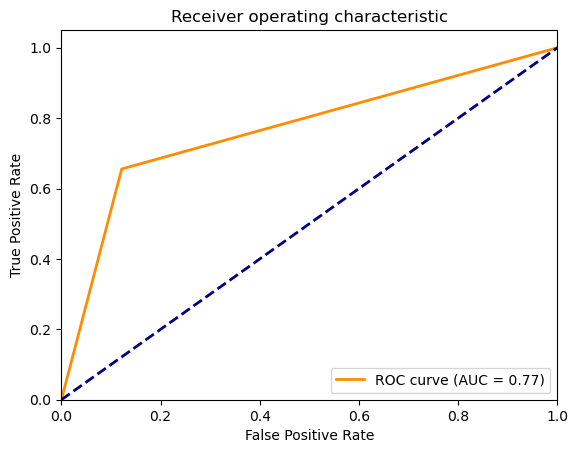

In [177]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_smote_test)

# Calculate the AUC (area under the curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# RandomForestClassifier

In [178]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create random forest classifier with regularization
clf = RandomForestClassifier()



In [179]:
rfc_model= Pipeline(steps=[('non-linear-method',clf)])

In [180]:
rfc_model.fit(x_train,y_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('non-linear-method', RandomForestClassifier())])

In [181]:
rfc_model.score(x_train,y_train)

1.0

In [182]:
rfc_model.score(x_test,y_test)

0.9105451483898127

In [183]:
y_pred_train=rfc_model.predict(x_train)

In [184]:
y_pred_test=rfc_model.predict(x_test)

In [185]:
f1_score(y_pred_train,y_train)

1.0

In [186]:
f1_score(y_pred_test,y_test)

0.8371023380605597

fit with upsample data

In [187]:
rfc_model_smote= Pipeline(steps=[('non-linear-method',clf)])

In [188]:
rfc_model_smote.fit(x_smote_train,y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('non-linear-method', RandomForestClassifier())])

In [189]:
rfc_model_smote.score(x_smote_train,y_smote_train)

1.0

In [190]:
rfc_model_smote.score(x_test,y_test)

0.9069669543254052

Random FOREST WITH HYPER PARAMETERS

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd


# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10,20,30,40,50],
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [10, 30, 50,60,70],
}

# Create Random Forest Classifier
rfc = RandomForestClassifier()

# Perform GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Train final model using best hyperparameters
#rfc = RandomForestClassifier(**best_params)



C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyperparameters: {'max_depth': 20, 'max_features': 60, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [192]:

# Train final model using best hyperparameters
rfc = RandomForestClassifier(**best_params)

In [193]:
rfc.fit(x_train,y_train)

C:\Users\karan\AppData\Local\Temp\ipykernel_3680\4070307935.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=20, max_features=60, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50)

In [194]:
rfc.score(x_train,y_train)

0.9424797389748447

In [195]:
rfc.score(x_test,y_test)

0.8972847821511261

In [196]:
y_pred_train=rfc.predict(x_train)

In [197]:
y_pred_test=rfc.predict(x_test)

In [198]:
f1_score(y_pred_train,y_train)

0.896564777136368

In [199]:
f1_score(y_pred_test,y_test)

0.8145896656534953

FIT WIT UPSAMPLE DATA

In [202]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10,20,300.,40,50],
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [10, 30, 50,60,70],
}

# Create Random Forest Classifier
rfc = RandomForestClassifier()

# Perform GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_smote_train, y_smote_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Train final model using best hyperparameters
rfc_smote = RandomForestClassifier(**best_params)


C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyperparameters: {'max_depth': 20, 'max_features': 60, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}


In [206]:
rfc_smote.fit(x_smote_train, y_smote_train)

C:\Users\karan\AppData\Local\Temp\ipykernel_3680\344356258.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_smote.fit(x_smote_train, y_smote_train)


RandomForestClassifier(max_depth=20, max_features=60, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=40)

In [208]:
rfc_smote.score(x_smote_train, y_smote_train)

0.9557581645616919

In [209]:
rfc_smote.score(x_test, y_test)

0.8808671858556093

In [210]:
y_pred_train=rfc_smote.predict(x_smote_train)

In [211]:
y_pred_test=rfc_smote.predict(x_test)

In [214]:

cm = confusion_matrix(y_smote_train, y_pred_train)
print(cm)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
# Generate the classification report
report = classification_report(y_smote_train, y_pred_train)
print(report)

print(report_test)


[[13003   378]
 [  806 12575]]
[[3109  205]
 [ 361 1076]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13381
           1       0.97      0.94      0.96     13381

    accuracy                           0.96     26762
   macro avg       0.96      0.96      0.96     26762
weighted avg       0.96      0.96      0.96     26762

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3314
           1       0.70      0.66      0.68      1437

    accuracy                           0.81      4751
   macro avg       0.78      0.77      0.77      4751
weighted avg       0.81      0.81      0.81      4751



In [215]:
f1_score(y_smote_train, y_pred_train)

0.9550391129338497

In [216]:
f1_score(y_test, y_pred_test)

0.791758646063282

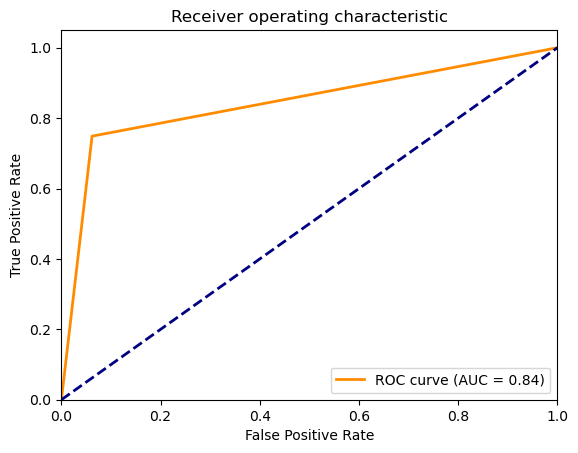

In [217]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the AUC (area under the curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# XGBOOST CLASSIFIER

In [218]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Define the model
xgboost= XGBClassifier()




In [219]:
xg_model= Pipeline(steps=[('non-linear-method',xgboost)])

In [220]:
xg_model.fit(x_train,y_train)

Pipeline(steps=[('non-linear-method',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [221]:
xg_model.score(x_train,y_train)

0.9575834122723924

In [222]:
xg_model.score(x_test,y_test)

0.9141233424542201

In [223]:
y_pred_train=xg_model.predict(x_train)

In [224]:
y_pred_test=xg_model.predict(x_test)

In [226]:
f1_score(y_pred_train,y_train)

0.9253565475087979

In [227]:
f1_score(y_pred_test,y_test)

0.8479880774962741

Fit with upsample data 

In [228]:
xg_model.fit(x_smote_train,y_smote_train)

Pipeline(steps=[('non-linear-method',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [229]:
xg_model.score(x_smote_train,y_smote_train)

0.9659965622898139

In [230]:
xg_model.score(x_test,y_test)

0.9158071984845296

In [231]:
y_pred_train=xg_model.predict(x_smote_train)

In [232]:
y_pred_test=xg_model.predict(x_test)

In [233]:
cm = confusion_matrix(y_smote_train, y_pred_train)
print(cm)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
# Generate the classification report
report = classification_report(y_smote_train, y_pred_train)
print(report)
report_test = classification_report(y_test, y_pred_test)

print(report_test)

[[13157   224]
 [  686 12695]]
[[3193  121]
 [ 279 1158]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     13381
           1       0.98      0.95      0.97     13381

    accuracy                           0.97     26762
   macro avg       0.97      0.97      0.97     26762
weighted avg       0.97      0.97      0.97     26762

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3314
           1       0.91      0.81      0.85      1437

    accuracy                           0.92      4751
   macro avg       0.91      0.88      0.90      4751
weighted avg       0.92      0.92      0.91      4751



In [234]:
f1_score(y_pred_train,y_smote_train)

0.9653992395437262

In [235]:
f1_score(y_pred_test,y_test)

0.8527245949926362

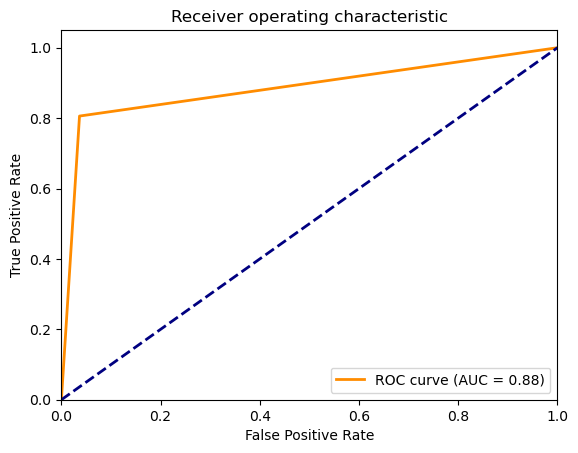

In [236]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the AUC (area under the curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# xgboost with hyper parameters

In [237]:
# Define the hyperparameters grid
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [2, 3, 4, 5],
              'learning_rate': np.arange(0.1, 1, 0.1)}

# Define the randomized search cross validation
xgboost_parameters= RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


<IPython.core.display.Javascript object>

In [238]:
xg_params_model= Pipeline(steps=[('non-linear-method',xgboost_parameters)])

In [239]:
xg_params_model.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Pipeline(steps=[('non-linear-method',
                 RandomizedSearchCV(cv=3,
                                    estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            inter...
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...),
                                    n_iter=100, n_jobs=-1,
                                    param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                                         'max_depth': [2, 3, 4,
                                                                       5],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200]},
                                    random_state=42, verbose=2))])

In [241]:
xg_params_model.score(x_train,y_train)

0.961688243342806

In [242]:
xg_params_model.score(x_test,y_test)

0.9168596085034729

In [243]:
xgboost_parameters.fit(x_smote_train,y_smote_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [246]:

# Get best hyperparameters
best_params = xgboost_parameters.best_params_
print('Best hyperparameters:', best_params)


Best hyperparameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.30000000000000004}


In [247]:
xgboost_parameters.score(x_smote_train,y_smote_train)

0.9704431656826844

In [248]:
xgboost_parameters.score(x_test,y_test)

0.9160176804883182

In [249]:
y_pred_smote_train=xgboost_parameters.predict(x_smote_train)

In [250]:
y_pred_smote_test=xgboost_parameters.predict(x_test)

In [251]:
f1_score(y_pred_smote_train,y_smote_train)

0.8644364145005246

In [252]:
f1_score(y_pred_smote_test,y_test)

0.8526043590690802

# SVMC

In [253]:
from sklearn.svm import SVC


In [254]:
svm=SVC()

In [256]:
svm.fit(x_train,y_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [257]:
svm.score(x_train,y_train)

0.9450057888643301

In [258]:
svm.score(x_test,y_test)

0.9265417806777521

In [259]:
y_pred_train=svm.predict(x_train)

In [260]:
y_pred_test=svm.predict(x_test)

In [261]:
f1_score(y_pred_train,y_train)

0.902272514729262

In [262]:
f1_score(y_pred_test,y_test)

0.8703084355258269

fit with upsampling data

In [263]:
svm.fit(x_smote_train,y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [264]:
svm.score(x_smote_train,y_smote_train)

0.9545624392795755

In [265]:
svm.score(x_test,y_test)

0.9301199747421596

In [266]:
y_pred_train=svm.predict(x_smote_train)

In [267]:
y_pred_test=svm.predict(x_test)

In [268]:
f1_score(y_pred_train,y_smote_train)

0.9533992488694719

In [269]:
f1_score(y_pred_test,y_test)

0.8786549707602339

# hyper parameters svm

In [270]:
svm = SVC(kernel='rbf', C=1, gamma='scale')

In [271]:
svm.fit(x_smote_train,y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

In [272]:
svm.score(x_smote_train,y_smote_train)

0.9545624392795755

In [273]:
svm.score(x_test,y_test)

0.9301199747421596

In [274]:
y_pred_train=svm.predict(x_smote_train)

In [275]:
y_pred_test=svm.predict(x_test)

In [276]:
f1_score(y_pred_train,y_smote_train)

0.9533992488694719

In [277]:
f1_score(y_pred_test,y_test)

0.8786549707602339

#    KNN CLASSIFIER

In [278]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [279]:
# Create the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

In [280]:
# Train the classifier on the training data
knn.fit(x_train, y_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [281]:
knn.score(x_train,y_train)

0.9440585201557731

In [282]:
knn.score(x_test,y_test)

0.9370658808671859

In [283]:
y_pred_train=knn.predict(x_train)

In [284]:
y_pred_test=knn.predict(x_test)

In [285]:
f1_score(y_pred_train,y_train)

0.9011806265687459

In [286]:
f1_score(y_pred_test,y_test)

0.8903557022368903

Fit with upsampling data

In [326]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your data into X (features) and y (labels)
# For example, X could be a matrix of numerical features, and y could be a vector of categorical labels


# Define the range of n_neighbors values to try
n_neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Keep track of the best accuracy and corresponding n_neighbors value
best_accuracy = 0
best_n_neighbors = None

# Try each value of n_neighbors and keep track of the best one
for n_neighbors in n_neighbors_values:
    # Create the KNN classifier with the current n_neighbors value
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the classifier on the training data
    knn.fit(x_smote_train, y_smote_train)

    # Use the trained classifier to make predictions on the testing data
    y_pred = knn.predict(x_test)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Keep track of the best accuracy and corresponding n_neighbors value
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

print("Best accuracy:", best_accuracy)
print("Best n_neighbors:", best_n_neighbors)


C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was pas

Best accuracy: 0.9238055146284992
Best n_neighbors: 15


In [327]:
# Create the KNN classifier with k=5
knn_smote= KNeighborsClassifier(n_neighbors=15)

In [328]:
knn_smote.fit(x_smote_train,y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [329]:
knn_smote.score(x_smote_train,y_smote_train)

0.9341230102383977

In [330]:
knn_smote.score(x_test,y_test)

0.9238055146284992

In [331]:
y_pred_train=knn_smote.predict(x_smote_train)

In [332]:
y_pred_test=knn_smote.predict(x_test)

In [333]:
f1_score(y_pred_train,y_smote_train)

0.932413264328158

In [334]:
f1_score(y_pred_test,y_test)

0.8719037508846426

# GRADIENT BOOSTING CLASSIFIER

In [335]:
from sklearn.ensemble import GradientBoostingClassifier


# create a gradient boosting classifier and fit it to the training data
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)


C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [336]:
gb_classifier.score(x_train,y_train)

0.8321755604673192

In [337]:
gb_classifier.score(x_test,y_test)

0.8316143969690591

In [339]:
y_pred_train=gb_classifier.predict(x_train)

In [340]:
y_pred_test=gb_classifier.predict(x_test)

In [341]:
f1_score(y_pred_train,y_train)

0.6806209313970956

In [342]:
f1_score(y_pred_test,y_test)

0.6891996891996892

fit with upsampling data

In [343]:

# create a gradient boosting classifier and fit it to the training data
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_smote_train, y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [344]:
gb_classifier.score(x_smote_train,y_smote_train)

0.8507585382258426

In [345]:
gb_classifier.score(x_test,y_test)

0.8025678804462218

In [346]:
y_pred_train=gb_classifier.predict(x_smote_train)

In [347]:
y_pred_test=gb_classifier.predict(x_test)

In [349]:
f1_score(y_pred_train,y_smote_train)

0.8477664278091173

In [350]:
f1_score(y_pred_test,y_test)

0.6678470254957507

# gradient Boosting classifier with hyper parameters tuning

In [351]:
# create a gradient boosting classifier with some hyperparameters
gb_classifier_params= GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=5)


In [352]:
gb_classifier_params.fit(x_train,y_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)

In [353]:
gb_classifier_params.score(x_train,y_train)

0.8703820650457846

In [354]:
gb_classifier_params.score(x_test,y_test)

0.858977057461587

In [355]:
y_pred_train=gb_classifier_params.predict(x_train)

In [356]:
y_pred_test=gb_classifier_params.predict(x_test)

In [357]:
f1_score(y_pred_train,y_train)

0.7544122046066408

In [358]:
f1_score(y_pred_test,y_test)

0.7399068322981367

fit with upsampling data

In [359]:
# create a gradient boosting classifier with some hyperparameters
gb_classifier_params= GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=5)


In [360]:
gb_classifier_params.fit(x_smote_train,y_smote_train)

C:\Users\karan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)

In [361]:
gb_classifier_params.score(x_smote_train,y_smote_train)

0.8752335400941633

In [362]:
gb_classifier_params.score(x_test,y_test)

0.8202483687644706

In [367]:
y_pred_train=gb_classifier_params.predict(x_smote_train)

In [368]:
y_pred_test=gb_classifier_params.predict(x_test)

In [369]:
f1_score(y_pred_train,y_smote_train)

0.8725426575562087

In [370]:
f1_score(y_pred_test,y_test)

0.6943450250536864